In [1]:
#import important modulaes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("completed")

completed


In [2]:
#load data and show data head
data=pd.read_csv("7. Udemy Courses.csv")
print(data.head())

   course_id                                       course_title  is_paid  \
0     288942  #1 Piano Hand Coordination: Play 10th Ballad i...     True   
1    1170074  #10 Hand Coordination - Transfer Chord Ballad ...     True   
2    1193886  #12 Hand Coordination: Let your Hands dance wi...     True   
3    1116700  #4 Piano Hand Coordination: Fun Piano Runs in ...     True   
4    1120410  #5  Piano Hand Coordination:  Piano Runs in 2 ...     True   

  price  num_subscribers  num_reviews  num_lectures               level  \
0    35             3137           18            68          All Levels   
1    75             1593            1            41  Intermediate Level   
2    75              482            1            47  Intermediate Level   
3    75              850            3            43  Intermediate Level   
4    75              940            3            32  Intermediate Level   

  content_duration   published_timestamp              subject  
0        1.5 hours  2014-09-

In [3]:
#describe data
print(data.describe())

          course_id  num_subscribers   num_reviews  num_lectures
count  3.682000e+03      3682.000000   3682.000000   3682.000000
mean   6.766121e+05      3194.230310    156.093156     40.065182
std    3.436355e+05      9499.378361    934.957204     50.373299
min    8.324000e+03         0.000000      0.000000      0.000000
25%    4.078430e+05       110.250000      4.000000     15.000000
50%    6.885580e+05       911.500000     18.000000     25.000000
75%    9.617515e+05      2540.250000     67.000000     45.000000
max    1.282064e+06    268923.000000  27445.000000    779.000000


In [4]:
#check missing data
check_missing_data = data.isnull().sum()
print(check_missing_data)


course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [5]:
#check repeated data
print("number of all data:-      ",len(data))
print("number of unique data:-   ",data["course_id"].nunique())
print("number of repeated data:- ",len(data)-data["course_id"].nunique())



number of all data:-       3682
number of unique data:-    3676
number of repeated data:-  6


In [6]:
#remove repeated data (clean data)
print("befor clean data:- ",len(data))
frequent_courses={}
deleted_raw=[]
for raw in data.index:
    if(data.iloc[raw,0] not in frequent_courses):  
        frequent_courses[data.iloc[raw,0]]=1
    else:
        deleted_raw.append(raw)
       
data=data.drop(data.index[deleted_raw])
print("after clean data:- ",len(data))


befor clean data:-  3682
after clean data:-  3676


 Most types of courses are paid:- True


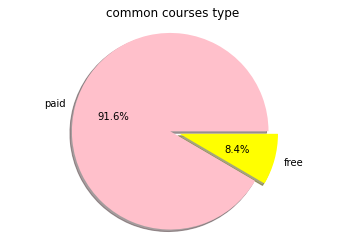

In [100]:
#what is common courses paid or free
free_or_paid=data["is_paid"].value_counts()
print (' Most types of courses are paid:- {0}' .format(free_or_paid.index[0]))
plt.pie(free_or_paid[0:len(free_or_paid)],labels=["paid","free"],colors=["pink","yellow"],shadow=True,explode=[0.05,0.05],autopct='%1.1f%%')
plt.title("common courses type ")
plt.axis("equal")
plt.show()    

most course get reviews is:- ( The Web Developer Bootcamp )
course id:- (625204) 
course type:- (Web Development)


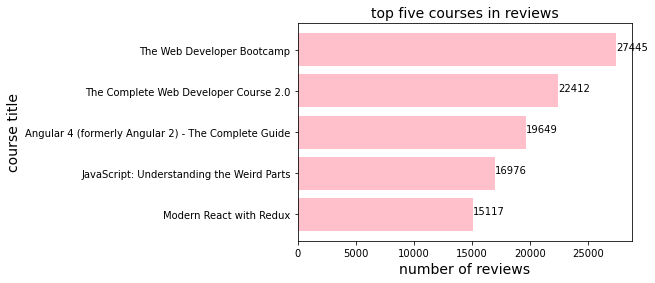

In [44]:
#best five course in reviews
reviews_sort=data.sort_values("num_reviews")
print("most course get reviews is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(reviews_sort["course_title"].iloc[-1],reviews_sort["course_id"].iloc[-1],reviews_sort["subject"].iloc[-1]))
reviews_sort['course_id'] = reviews_sort['course_id'].apply(str)
y=reviews_sort['course_title'].iloc[-5:].values
x=reviews_sort["num_reviews"].iloc[-5:].values
plt.barh(y=y,width=x,color='pink')
plt.title("top five courses in reviews",fontsize=14)
plt.xlabel('number of reviews',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()


In [10]:
#reviews_info
reviews_info=data["num_reviews"].value_counts()
print("common review number is:- ",reviews_info.index[0])
print("less review number is:-   ",reviews_info.index[len(reviews_info)-1])
print("max review number is:-    ",max(data["num_reviews"]))
print("min review number is:-    ",min(data["num_reviews"]))
print("mean of reviews is:-      ",np.mean(data["num_reviews"]))

common review number is:-  0
less review number is:-    1981
max review number is:-     27445
min review number is:-     0
mean of reviews is:-       156.2051142546246


most common price is:-  20
less common price is:-    155
max price is:-     Free
min price is:-     100


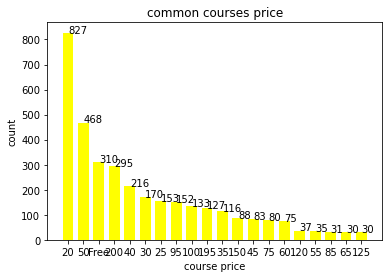

In [63]:
#cources price info
price_info=data["price"].value_counts()
print("most common price is:- ",price_info.index[0])
print("less common price is:-   ",price_info.index[len(price_info)-1])
print("max price is:-    ",max(data["price"]))
print("min price is:-    ",min(data["price"]))
# print("mean of price is:-      ",np.mean(data["price"]))
x=price_info.index[0:20]
y=price_info[0:20]
plt.bar(x,y,width=0.7,color='yellow')
plt.title("common courses price")
for xx,yy in zip(x,y):
  plt.text(xx,yy,yy)
plt.xlabel('course price')
plt.ylabel('count')
plt.show()

most course has large subscribers is:- ( Learn HTML5 Programming From Scratch )
course id:- (41295) 
course type:- (Web Development)


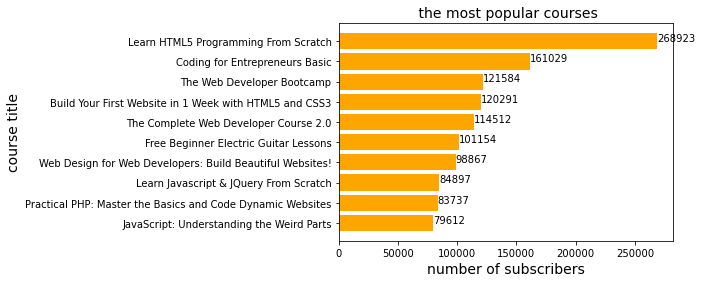

In [78]:
#popular cources
subscribers_sort=data.sort_values("num_subscribers")
print("most course has large subscribers is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(subscribers_sort["course_title"].iloc[-1],subscribers_sort["course_id"].iloc[-1],subscribers_sort["subject"].iloc[-1]))
y=subscribers_sort['course_title'].iloc[-10:].values
x=subscribers_sort["num_subscribers"].iloc[-10:].values
plt.barh(y=y,width=x,color=['orange'])
plt.title(" the most popular courses",fontsize=14)
plt.xlabel('number of subscribers',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

In [43]:
#subscriber_info
subscriber_info=data["num_subscribers"].value_counts()
print("common subscriber number is:- ",subscriber_info.index[0])
print("less subscriber number is:-   ",subscriber_info.index[len(subscriber_info)-1])
print("max subscriber number is:-    ",max(data["num_subscribers"]))
print("min subscriber number is:-    ",min(data["num_subscribers"]))
print("mean of subscriber is:-      ",np.mean(data["num_subscribers"]))

common review number is:-  0
less review number is:-    4061
max review number is:-     268923
min review number is:-     0
mean of reviews is:-       3187.668933623504


most course have large lectures  is:- ( Back to School Web Development and Programming Bundle )
course id:- (79154) 
course type:- (Web Development)


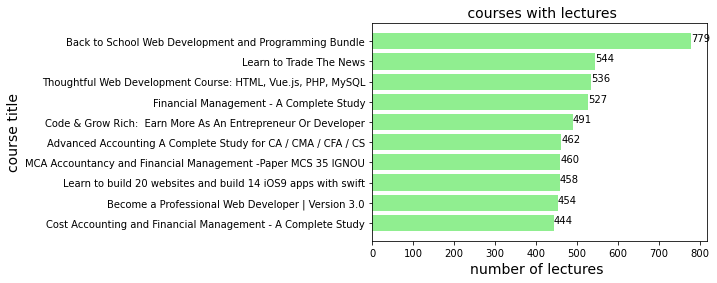

In [69]:
#lecture number
lectures_sort=data.sort_values("num_lectures")
print("most course have large lectures  is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(lectures_sort["course_title"].iloc[-1],lectures_sort["course_id"].iloc[-1],lectures_sort["subject"].iloc[-1]))
y=lectures_sort['course_title'].iloc[-10:].values
x=lectures_sort["num_lectures"].iloc[-10:].values
plt.barh(y=y,width=x,color=['lightGreen'])
plt.title(" courses with lectures",fontsize=14)
plt.xlabel('number of lectures ',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

In [54]:
#lectures_info
lectures_info=data["num_lectures"].value_counts()
print("common lectures number is:-      ",lectures_info.index[0])
print("less common lectures number is:- ",lectures_info.index[len(lectures_info)-1])
print("max lectures number is:-         ",max(data["num_lectures"]))
print("min lectures number is:-         ",min(data["num_lectures"]))
print("mean of lectures is:-            ",np.mean(data["num_lectures"]))

common lectures number is:-       12
less common lectures number is:-  779
max lectures number is:-          779
min lectures number is:-          0
mean of lectures is:-             40.09657236126224


 Most common subject of courses :- Web Development


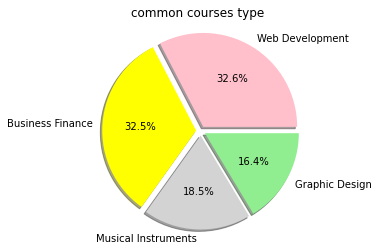

In [67]:
#common subject
common_subject=data["subject"].value_counts()
print (' Most common subject of courses :- {0}' .format(common_subject.index[0]))
plt.pie(common_subject[0:len(common_subject)],labels=common_subject.index,colors=["pink","yellow","lightGray","lightGreen"],shadow=True,explode=[0.05]*len(common_subject),autopct='%1.1f%%')
plt.title("common courses type ")
plt.axis("equal")
plt.show() 


All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64
most common level is:-  All Levels


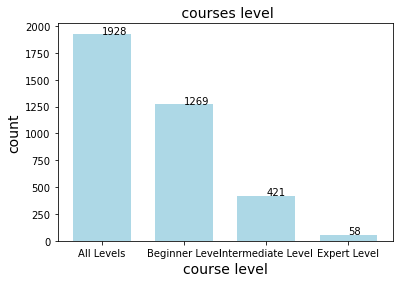

In [77]:
level=data["level"].value_counts()
print(level)
print("most common level is:- ",level.index[0])
x=level.index
y=level
plt.bar(x,y,width=0.7,color='lightBlue')
plt.title(" courses level",fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,yy)
plt.xlabel('course level',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

most beginner course has subscribers is:- ( Coding for Entrepreneurs Basic )
course id:- (59014) 
course type:- (Web Development)


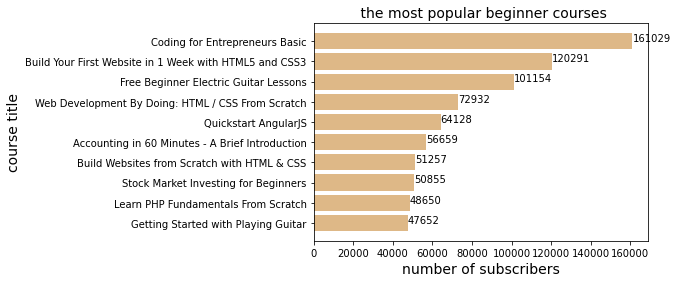

In [93]:
#popular beginner courses 
beginner_data=data[data["level"]=="Beginner Level"]
subscribers_sort=beginner_data.sort_values("num_subscribers")
print("most beginner course has subscribers is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(subscribers_sort["course_title"].iloc[-1],subscribers_sort["course_id"].iloc[-1],subscribers_sort["subject"].iloc[-1]))
y=subscribers_sort['course_title'].iloc[-10:].values
x=subscribers_sort["num_subscribers"].iloc[-10:].values
plt.barh(y=y,width=x,color=['burlywood'])
plt.title(" the most popular beginner courses",fontsize=14)
plt.xlabel('number of subscribers',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

most Intermediate course has subscribers is:- ( Introduction to Financial Modeling )
course id:- (151668) 
course type:- (Business Finance)


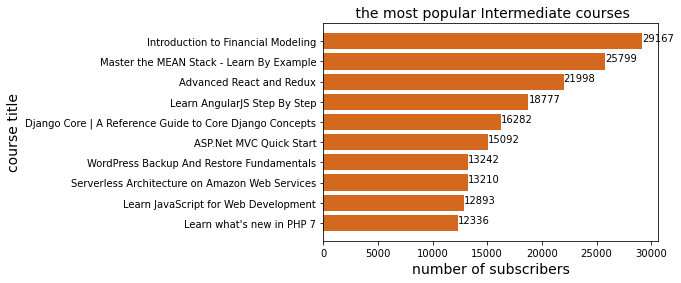

In [95]:
#popular Intermediate Level  
Intermediate_data=data[data["level"]=="Intermediate Level"]
subscribers_sort=Intermediate_data.sort_values("num_subscribers")
print("most Intermediate course has subscribers is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(subscribers_sort["course_title"].iloc[-1],subscribers_sort["course_id"].iloc[-1],subscribers_sort["subject"].iloc[-1]))
y=subscribers_sort['course_title'].iloc[-10:].values
x=subscribers_sort["num_subscribers"].iloc[-10:].values
plt.barh(y=y,width=x,color=['chocolate'])
plt.title(" the most popular Intermediate courses",fontsize=14)
plt.xlabel('number of subscribers',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

most experted course has subscribers is:- ( Options Trading 3 : Advanced Stock Profit and Success Method )
course id:- (476268) 
course type:- (Business Finance)


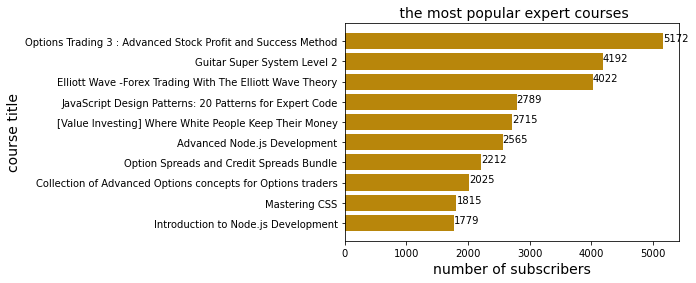

In [96]:
#popular expert Level  
expert_data=data[data["level"]=="Expert Level"]
subscribers_sort=expert_data.sort_values("num_subscribers")
print("most experted course has subscribers is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(subscribers_sort["course_title"].iloc[-1],subscribers_sort["course_id"].iloc[-1],subscribers_sort["subject"].iloc[-1]))
y=subscribers_sort['course_title'].iloc[-10:].values
x=subscribers_sort["num_subscribers"].iloc[-10:].values
plt.barh(y=y,width=x,color=['darkgoldenrod'])
plt.title(" the most popular expert courses",fontsize=14)
plt.xlabel('number of subscribers',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

most all_level course has subscribers is:- ( Learn HTML5 Programming From Scratch )
course id:- (41295) 
course type:- (Web Development)


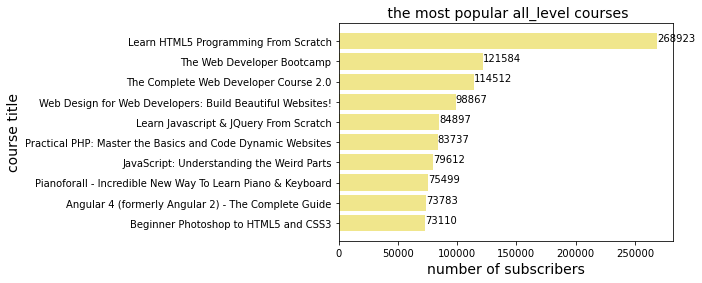

In [99]:
#popular all Level  courses
all_data=data[data["level"]=="All Levels"]
subscribers_sort=all_data.sort_values("num_subscribers")
print("most all_level course has subscribers is:- ( {0} )\ncourse id:- ({1}) \ncourse type:- ({2})".format(subscribers_sort["course_title"].iloc[-1],subscribers_sort["course_id"].iloc[-1],subscribers_sort["subject"].iloc[-1]))
y=subscribers_sort['course_title'].iloc[-10:].values
x=subscribers_sort["num_subscribers"].iloc[-10:].values
plt.barh(y=y,width=x,color=['khaki'])
plt.title(" the most popular all_level courses",fontsize=14)
plt.xlabel('number of subscribers',fontsize=14)
plt.ylabel('course title',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

 Most common subject of courses :- 1 hour


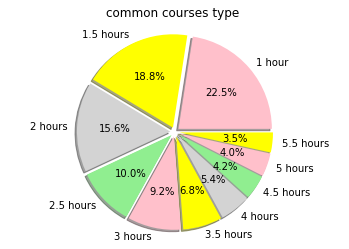

In [104]:
#content duration
common_duration=data["content_duration"].value_counts()
print (' Most common subject of courses :- {0}' .format(common_duration.index[0]))
plt.pie(common_duration[0:10],labels=common_duration.index[0:10],colors=["pink","yellow","lightGray","lightGreen"],shadow=True,explode=[0.05]*10,autopct='%1.1f%%')
plt.title("common courses ontent duration")
plt.axis("equal")
plt.show() 